### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

## Retail Ecommerce Sales data

In [2]:
data = pd.read_csv('../../data/retailEcommercesales/retailEcommerceSales.csv',sep=',')

In [3]:
retailEcommercesales = data[~data["Sales"].str.contains('unadjusted')]

In [4]:
retailEcommercesales = retailEcommercesales.filter(['REF_DATE','VALUE'])
retailEcommercesales.columns = retailEcommercesales.columns.str.replace('VALUE', 'Ecommerce_sales')
retailEcommercesales.columns = retailEcommercesales.columns.str.replace('REF_DATE', 'Date')

In [5]:
retailEcommercesales.dtypes

Date               object
Ecommerce_sales     int64
dtype: object

In [6]:
retailEcommercesales.head(2)

,Date,Ecommerce_sales
3,2016-01,977198
7,2016-02,1006610


In [28]:
retailEcommercesales.shape

(74, 2)

## Time series plot of Retail Ecommerce Sales

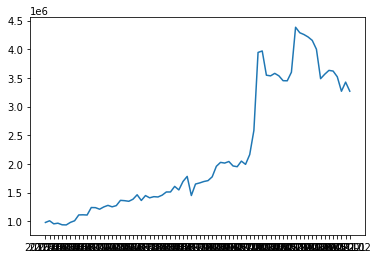

In [7]:
retailEcommercesales_dup = retailEcommercesales.copy()
retailEcommercesales_dup.index=retailEcommercesales_dup['Date']
plt.plot(retailEcommercesales_dup['Ecommerce_sales'])
plt.show()

### Pytrend Library

In [10]:
pytrends = TrendReq(hl='en-us', backoff_factor=0.1)

In [23]:
#kw_list = ["Blockchain","recession","inflation"]
pytrends.build_payload(kw_list=[''],cat=340, timeframe='today 5-y', geo='CA', gprop='')

In [28]:
data = pytrends.related_topics()

In [30]:
def ecommerce_trend(keywords=[''],category='340'):
    kw_list = keywords
    cat=category
    timeframe = '2004-01-01 2022-05-10'
    geo='CA'
    
    pytrends.build_payload(kw_list, cat, timeframe, geo, gprop='')
    data=pytrends.related_topics()
    return data

In [36]:
data=ecommerce_trend(keywords=[''],category='340')
data

{'': {'rising':      value formattedValue                                               link  \
  0   611700       Breakout  /trends/explore?q=/g/11c1wk85q7&date=2004-01-0...   
  1   611700       Breakout  /trends/explore?q=/m/02ntbw8&date=2004-01-01+2...   
  2   267200       Breakout  /trends/explore?q=/g/11h0byg_3f&date=2004-01-0...   
  3   178750       Breakout  /trends/explore?q=/m/0z6r6vw&date=2004-01-01+2...   
  4   100200       Breakout  /trends/explore?q=/m/0h94y36&date=2004-01-01+2...   
  5    93800       Breakout  /trends/explore?q=/m/02y1vz&date=2004-01-01+20...   
  6    86100       Breakout  /trends/explore?q=/m/09m8qzn&date=2004-01-01+2...   
  7    47850       Breakout  /trends/explore?q=/m/09jcvs&date=2004-01-01+20...   
  8    43700       Breakout  /trends/explore?q=/m/0k8z&date=2004-01-01+2022...   
  9    40550       Breakout  /trends/explore?q=/g/11b7dtvvwt&date=2004-01-0...   
  10   39400       Breakout  /trends/explore?q=/m/03d5cjk&date=2004-01-01+2...   
  

In [ ]:
keyword_frame = set()
keyword_frame1 = data['']['rising']['topic_title']
keyword_frame2 = data['']['rising']['topic_title']
keyword_frame.update(keyword_frame1)
keyword_frame.update(keyword_frame2)